In [1]:
import numpy as np
import xarray_behave as xb
import xarray_behave.song as xbs
import matplotlib.pyplot as plt

datename = 'localhost-20190712_160816'
root = '/Volumes/ukme04/#Common/chainingmic'

ds = xb.assemble(datename, root, include_tracks=False, include_poses=False)
ds    

/Users/jclemens/miniconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


<xarray.Dataset>
Dimensions:        (event_types: 5, sampletime: 9179817, time: 917982)
Coordinates:
  * sampletime     (sampletime) float64 0.0 0.0001 0.0002 ... 918.0 918.0 918.0
  * time           (time) float64 0.0 0.001 0.002 0.003 ... 918.0 918.0 918.0
  * event_types    (event_types) <U17 'aggression_manual' ... 'sine'
    nearest_frame  (time) uint64 654 654 654 654 655 ... 92379 92379 92379 92379
Data variables:
    song           (sampletime) float32 -0.003 -0.012 -0.02 ... -0.007 -0.004
    song_events    (time, event_types) bool False False False ... False False
Attributes:
    video_filename:  /Volumes/ukme04/#Common/chainingmic/dat/localhost-201907...
    datename:        localhost-20190712_160816
    root:            /Volumes/ukme04/#Common/chainingmic
    dat_path:        dat
    res_path:        res

In [2]:
ds.song_events.event_types.data

array(['aggression_manual', 'song_pulse_any', 'song_pulse_slow',
       'song_pulse_fast', 'sine'], dtype='<U17')

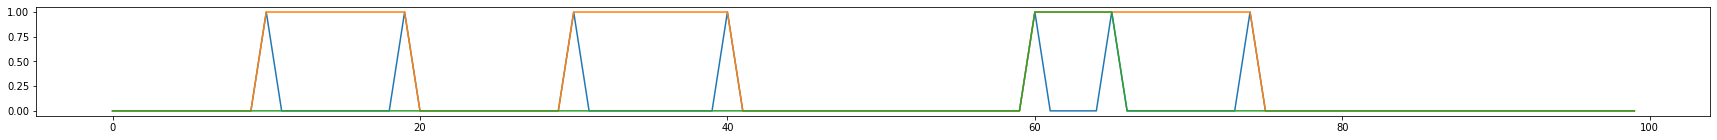

In [3]:
event_trace = np.full((100,), False)
event_trace[[10, 19, 30, 40]] = True
event_trace[[10, 19, 30, 40, 60, 65, 74]] = True

trace_10 = xbs.events_to_mask(event_trace, 10)
trace_5 = xbs.events_to_mask(event_trace, 5)

plt.gcf().set_size_inches(30,2)
plt.plot(event_trace)
plt.plot(trace_10)
plt.plot(trace_5)

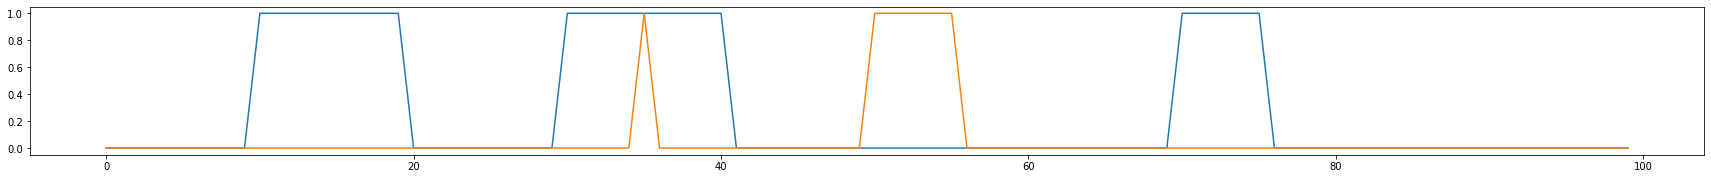

In [5]:
event_trace = np.full((100,), False)
event_trace[[10, 19, 30, 40, 70, 75]] = True
trace_1 = xbs.events_to_mask(event_trace, 10)

event_trace = np.full((100,), False)
event_trace[[50, 55, 64]] = True
trace_2 = xbs.events_to_mask(event_trace, 5)
trace_2[35] = True

traces = np.stack((trace_1, trace_2), axis=-1)

plt.gcf().set_size_inches(30,6)
plt.subplot(211)
plt.plot(trace_1)
plt.plot(trace_2)


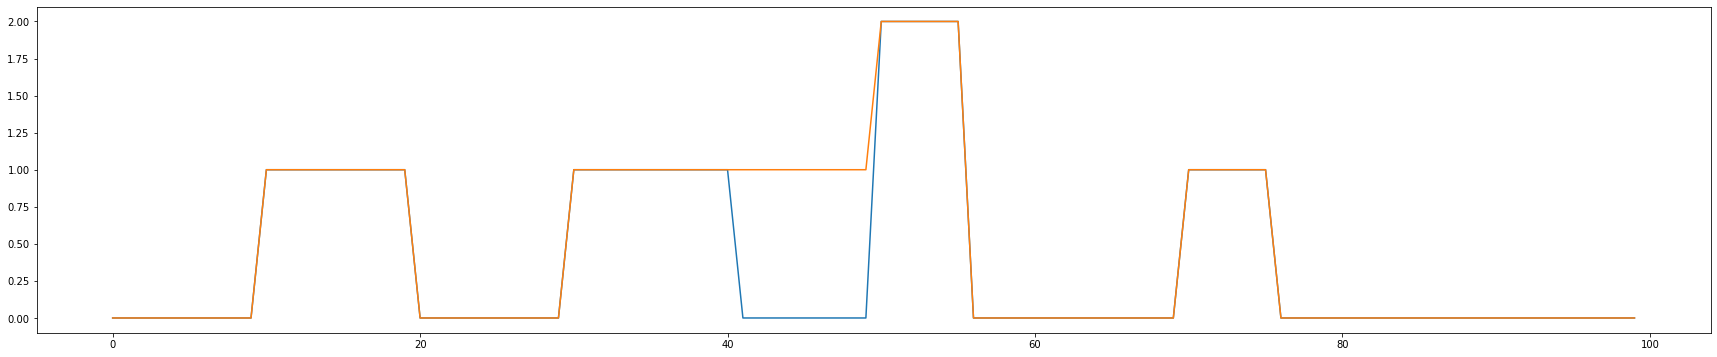

In [7]:
combined_mask = xbs.combine_masks(traces) 
combined_mask_glue = xbs.combine_masks(traces, max_interval=10) 

plt.gcf().set_size_inches(30,6)
plt.plot(combined_mask)
plt.plot(combined_mask_glue)
